Import all necessary libraries


In [1]:
!pip install --quiet kiteconnect pandas matplotlib numpy
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from kiteconnect import KiteConnect
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive',force_remount = True)
print("All libraries installed and imported successfully")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.5/771.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 3.6 MB/s eta 0:00:00
Mounted at /content/drive
All libraries installed and imported successfully


Setting up API key

In [2]:
API_KEY = "Your API key"
API_SECRET = "Your API Secret key "
REDIRECT_URL = "https://example.com"


kite = KiteConnect(api_key=API_KEY)


login_url = kite.login_url()
print(f"Login to your Kite account using this URL: {login_url}")


request_token = input("Paste the request token from the URL here: ")


try:
    data = kite.generate_session(request_token=request_token, api_secret=API_SECRET)
    access_token = data["access_token"]
    print(f"Access Token: {access_token}")


    kite.set_access_token(access_token)
    print("Kite Connect is now initialized and ready to use!")
except Exception as e:
    print(f"Error generating access token: {e}")

Login to your Kite account using this URL: https://kite.zerodha.com/connect/login?api_key=8re7mjcm2btaozwf&v=3
Paste the request token from the URL here: 2ELnJGP0R1eS9xlqQC7aCe0ovaJl4s3k
Access Token: k3Nxh5bTkvqorL7t24p2J49BFEREx6N6
Kite Connect is now initialized and ready to use!


Fetches monthly data (2016-2024)

In [22]:
import pandas as pd
from datetime import datetime, timedelta
from kiteconnect import KiteConnect

# Initialize KiteConnect
API_KEY = "8re7mjcm2btaozwf"
ACCESS_TOKEN = "k3Nxh5bTkvqorL7t24p2J49BFEREx6N6"  # Use the authenticated access token

kite = KiteConnect(api_key=API_KEY)
kite.set_access_token(ACCESS_TOKEN)

def fetch_nifty_ohlc_data(start_year=2016, end_year=2024, instrument_token=256265, save_path="/content/drive/My Drive/Nifty_50_OHLC.csv"):
    """
    Fetches historical OHLC data for Nifty 50 index from Zerodha API month by month and saves it as a CSV file in Google Drive.

    Parameters:
    - start_year: Year to start fetching data from.
    - end_year: Year to stop fetching data.
    - instrument_token: Zerodha instrument token for Nifty 50 (default: 256265).
    - save_path: Path to store the CSV file in Google Drive.

    Returns:
    - Pandas DataFrame of OHLC data.
    """
    all_data = []  # List to store monthly data chunks
    interval = "day"  # Daily timeframe

    for year in range(start_year, end_year + 1):
        for month in range(1, 13):  # Loop through months (1-12)
            start_date = datetime(year, month, 1)
            end_date = (start_date + timedelta(days=32)).replace(day=1) - timedelta(days=1)  # Last day of the month

            if end_date > datetime.today():  # Stop if end_date is in the future
                break

            try:
                print(f"Fetching data for {year}-{month:02d}...")
                data = kite.historical_data(instrument_token, start_date, end_date, interval)

                # Convert to DataFrame and keep only OHLC columns
                df = pd.DataFrame(data)[['date', 'open', 'high', 'low', 'close']]
                all_data.append(df)

            except Exception as e:
                print(f"Error fetching data for {year}-{month:02d}: {e}")

    # Merge all monthly data into a single DataFrame
    final_df = pd.concat(all_data, ignore_index=True)
    final_df['date'] = pd.to_datetime(final_df['date'])  # Ensure date format
    final_df.set_index('date', inplace=True)  # Set date as index
    final_df.sort_index(inplace=True)  # Ensure chronological order

    # Save to Google Drive
    final_df.to_csv(save_path)
    print(f"Data saved successfully to {save_path}")

    return final_df

# Run function to fetch data and save to Google Drive
nifty_data = fetch_nifty_ohlc_data()


Fetching data for 2016-01...
Fetching data for 2016-02...
Fetching data for 2016-03...
Fetching data for 2016-04...
Fetching data for 2016-05...
Fetching data for 2016-06...
Fetching data for 2016-07...
Fetching data for 2016-08...
Fetching data for 2016-09...
Fetching data for 2016-10...
Fetching data for 2016-11...
Fetching data for 2016-12...
Fetching data for 2017-01...
Fetching data for 2017-02...
Fetching data for 2017-03...
Fetching data for 2017-04...
Fetching data for 2017-05...
Fetching data for 2017-06...
Fetching data for 2017-07...
Fetching data for 2017-08...
Fetching data for 2017-09...
Fetching data for 2017-10...
Fetching data for 2017-11...
Fetching data for 2017-12...
Fetching data for 2018-01...
Fetching data for 2018-02...
Fetching data for 2018-03...
Fetching data for 2018-04...
Fetching data for 2018-05...
Fetching data for 2018-06...
Fetching data for 2018-07...
Fetching data for 2018-08...
Fetching data for 2018-09...
Fetching data for 2018-10...
Fetching data 

Calculate 9 day EMA

In [23]:
import pandas as pd

def calculate_9_ema(df):
    """Calculates the 9-day Exponential Moving Average (EMA) and adds it to the DataFrame."""
    df['9_EMA'] = df['close'].ewm(span=9, adjust=False).mean()
    return df

# Load the previously saved CSV file
csv_filename = "/content/drive/My Drive/Nifty_50_OHLC.csv"
nifty_df = pd.read_csv(csv_filename)

# Convert 'date' column to datetime format (if not already)
nifty_df['date'] = pd.to_datetime(nifty_df['date'])

# Calculate 9-EMA
nifty_df = calculate_9_ema(nifty_df)

# Save updated DataFrame with 9-EMA back to CSV
nifty_df.to_csv(csv_filename, index=False)



Calculate 21day EMA

In [24]:
import pandas as pd

def calculate_21_ema(df):
    """Calculates the 21-day Exponential Moving Average (EMA) and adds it to the DataFrame."""
    df['21_EMA'] = df['close'].ewm(span=21, adjust=False).mean()
    return df

# Load the previously saved CSV file
csv_filename = "/content/drive/My Drive/Nifty_50_OHLC.csv"
nifty_df = pd.read_csv(csv_filename)

# Convert 'date' column to datetime format (if not already)
nifty_df['date'] = pd.to_datetime(nifty_df['date'])

# Calculate 21-EMA
nifty_df = calculate_21_ema(nifty_df)

# Save updated DataFrame with 21-EMA back to CSV
nifty_df.to_csv(csv_filename, index=False)


Calculate 14-day RSI

In [25]:
import pandas as pd

def calculate_rsi(df, period=14):
    """Calculates the 14-day Relative Strength Index (RSI) using TradingView's smoothing logic."""
    delta = df['close'].diff()

    # Compute gain and loss
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    # Use exponential moving average (equivalent to TradingView's RMA)
    avg_gain = gain.ewm(com=period-1, adjust=False).mean()
    avg_loss = loss.ewm(com=period-1, adjust=False).mean()

    # Compute RSI using the TradingView formula
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

    return df

# Load the previously saved CSV file
csv_filename = "/content/drive/My Drive/Nifty_50_OHLC.csv"
nifty_df = pd.read_csv(csv_filename)

# Convert 'date' column to datetime format (if not already)
nifty_df['date'] = pd.to_datetime(nifty_df['date'])

# Calculate RSI using TradingView logic
nifty_df = calculate_rsi(nifty_df)

# Save updated DataFrame with new RSI values back to CSV
nifty_df.to_csv(csv_filename, index=False)




Calculate ADX(14-day)

In [26]:
import pandas as pd

def calculate_adx(df, di_period=14, adx_period=14):
    """Calculates the 14-day Average Directional Index (ADX) with TradingView logic."""

    # Calculate True Range (TR)
    df['TR'] = pd.concat([
        df['high'] - df['low'],
        abs(df['high'] - df['close'].shift(1)),
        abs(df['low'] - df['close'].shift(1))
    ], axis=1).max(axis=1)

    # Calculate +DM and -DM
    up_move = df['high'].diff()
    down_move = -df['low'].diff()

    df['+DM'] = up_move.where((up_move > down_move) & (up_move > 0), 0)
    df['-DM'] = down_move.where((down_move > up_move) & (down_move > 0), 0)

    # Compute Smoothed True Range using TradingView's ta.rma equivalent
    df['ATR'] = df['TR'].ewm(com=di_period-1, adjust=False).mean()

    # Compute Smoothed +DI and -DI
    df['+DI'] = (df['+DM'].ewm(com=di_period-1, adjust=False).mean() / df['ATR']) * 100
    df['-DI'] = (df['-DM'].ewm(com=di_period-1, adjust=False).mean() / df['ATR']) * 100

    # Compute DX (Directional Index)
    df['DX'] = 100 * (abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI']).replace(0, 1))

    # Compute ADX (Smoothed DX using RMA)
    df['ADX'] = df['DX'].ewm(com=adx_period-1, adjust=False).mean()

    # Drop unnecessary columns
    df.drop(columns=['+DM', '-DM', 'DX'], inplace=True)

    return df

# Load the previously saved CSV file
csv_filename = "/content/drive/My Drive/Nifty_50_OHLC.csv"
nifty_df = pd.read_csv(csv_filename)

# Convert 'date' column to datetime format (if not already)
nifty_df['date'] = pd.to_datetime(nifty_df['date'])

# Calculate ADX using TradingView logic
nifty_df = calculate_adx(nifty_df)

# Save updated DataFrame with ADX back to CSV
nifty_df.to_csv(csv_filename, index=False)


Check CE side strategy

In [64]:
def check_ce(data, row):
    """
    Checks if the CE strategy conditions are satisfied for the given row.

    Args:
        data (pd.DataFrame): The OHLC data with indicators.
        row (int): The current row to check CE conditions.

    Returns:
        bool: True if CE alert and trigger conditions are satisfied, else False.
    """
    # Get the alert candle (current row)
    alert = data.iloc[row]

    # Condition 1: 9-EMA crosses above 21-EMA (bullish crossover)
    if not (alert['9_EMA'] > alert['21_EMA'] and data.iloc[row - 1]['9_EMA'] <= data.iloc[row - 1]['21_EMA']):
        return False

    # Condition 2: RSI should be above 50 (bullish momentum confirmation)
    if not alert['RSI'] > 50:
        return False


    # If all conditions are met, return True for CE signal check
    return True


Check PE side strategy

In [65]:
def check_pe(data, row):
    """
    Checks if the PE strategy conditions are satisfied for the given row.

    Args:
        data (pd.DataFrame): The OHLC data with indicators.
        row (int): The current row to check PE conditions.

    Returns:
        bool: True if PE entry conditions are satisfied, else False.
    """
    # Get the current row's data
    alert = data.iloc[row]

    # Condition 1: 9-EMA crosses below 21-EMA (Bearish crossover)
    if not (alert['9_EMA'] < alert['21_EMA'] and data.iloc[row - 1]['9_EMA'] >= data.iloc[row - 1]['21_EMA']):
        return False

    # Condition 2: RSI should be below 50 (Bearish Momentum Confirmation)
    if not alert['RSI'] < 50:
        return False



    # If all conditions are met, return True (Valid PE trade signal)
    return True


Execute CE side strategy

In [70]:
import pandas as pd

def execute_ce(data, row):
    """
    Executes the CE strategy when a valid CE signal is found.

    Args:
        data (pd.DataFrame): The OHLC data with indicators.
        row (int): The row index where CE conditions are satisfied.

    Returns:
        dict: Contains profit, rows used, original SL, trailing SL, entry & exit details, and trade result status.
    """
    # Ensure there's a next day's data available
    if row + 1 >= len(data):
        return {
            'profit': 0,
            'rows_used': 1,
            'original_sl': None,
            'trail_sl': None,
            'status': 'no_trade',
            'entry_datetime': None,
            'exit_datetime': None,
            'entry_price': None,
            'exit_price': None
        }

    # Entry Execution: Buy at next day's open price
    entry_row = data.iloc[row + 1]  # Next day's candle
    entry_price = entry_row['open']
    entry_datetime = entry_row['date']  # Capture entry datetime

    # ATR-Based Stop-Loss and Target
    atr_value = entry_row['ATR']
    original_sl = entry_price - (1.5 * atr_value)  # Stop-Loss = Entry - (1 * ATR)
    target_price = entry_price + (3 * atr_value)   # Target = Entry + (3 * ATR)
    trail_sl = original_sl  # Initial trailing SL same as original SL

    rows_used = 1  # Count rows until exit
    profit = 0
    status = None

    # Monitor trade after entry
    for i in range(row + 2, len(data)):  # Start checking from the day after entry
        candle = data.iloc[i]
        rows_used += 1

        # Stop-Loss Condition: Exit immediately if price hits SL (Loss Trade)
        if candle['low'] <= original_sl:
            profit = original_sl - entry_price  # Loss calculation
            return {
                'profit': profit,
                'rows_used': rows_used,
                'original_sl': original_sl,
                'trail_sl': trail_sl,
                'status': 'loss',
                'entry_datetime': entry_datetime,
                'exit_datetime': candle['date'],
                'entry_price': entry_price,
                'exit_price': original_sl
            }

        #  Target Condition: Exit if price hits target (Win Trade)
        if candle['high'] >= target_price:
            profit = target_price - entry_price  # Profit calculation
            return {
                'profit': profit,
                'rows_used': rows_used,
                'original_sl': original_sl,
                'trail_sl': trail_sl,
                'status': 'win',
                'entry_datetime': entry_datetime,
                'exit_datetime': candle['date'],
                'entry_price': entry_price,
                'exit_price': target_price
            }

        # Update Trailing Stop-Loss (TSL)
        if candle['close'] > entry_price + (0.5 * atr_value):  # Move SL only when price moves +0.5 ATR
            trail_sl = max(trail_sl, candle['9_EMA'])  # New SL = Max(Trail SL, 9-EMA)

        # Exit Trade if price closes below the updated Trailing SL (Win Trade)
        if candle['low'] <= trail_sl and trail_sl > entry_price:
            profit = trail_sl - entry_price  # Profit calculation
            return {
                'profit': profit,
                'rows_used': rows_used,
                'original_sl': original_sl,
                'trail_sl': trail_sl,
                'status': 'win',
                'entry_datetime': entry_datetime,
                'exit_datetime': candle['date'],
                'entry_price': entry_price,
                'exit_price': trail_sl
            }

    # If trade is still open (No SL/TP hit), exit at the last available price
    last_candle = data.iloc[-1]
    profit = last_candle['close'] - entry_price
    return {
        'profit': profit,
        'rows_used': rows_used,
        'original_sl': original_sl,
        'trail_sl': trail_sl,
        'status': 'open_exit',
        'entry_datetime': entry_datetime,
        'exit_datetime': last_candle['date'],
        'entry_price': entry_price,
        'exit_price': last_candle['close']
    }


Execute PE side strategy

In [71]:
import pandas as pd

def execute_pe(data, row):
    """
    Executes the PE strategy when a valid PE signal is found.

    Args:
        data (pd.DataFrame): The OHLC data with indicators.
        row (int): The row index where PE conditions are satisfied.

    Returns:
        dict: Contains profit, rows used, original SL, trailing SL, entry & exit details, and trade result status.
    """
    # Ensure there's a next day's data available
    if row + 1 >= len(data):
        return {
            'profit': 0,
            'rows_used': 1,
            'original_sl': None,
            'trail_sl': None,
            'status': 'no_trade',
            'entry_datetime': None,
            'exit_datetime': None,
            'entry_price': None,
            'exit_price': None
        }

    # Entry Execution: Sell at next day's open price
    entry_row = data.iloc[row + 1]  # Next day's candle
    entry_price = entry_row['open']
    entry_datetime = entry_row['date']  # Capture entry datetime

    # ATR-Based Stop-Loss and Target
    atr_value = entry_row['ATR']
    original_sl = entry_price + (1.5 * atr_value)  # Stop-Loss = Entry + (1 * ATR)
    target_price = entry_price - (3 * atr_value)   # Target = Entry - (3 * ATR)
    trail_sl = original_sl  # Initial trailing SL same as original SL

    rows_used = 1  # Count rows until exit
    profit = 0
    status = None

    # Monitor trade after entry
    for i in range(row + 2, len(data)):  # Start checking from the day after entry
        candle = data.iloc[i]
        rows_used += 1

        #  Stop-Loss Condition: Exit immediately if price hits SL (Loss Trade)
        if candle['high'] >= original_sl:
            profit = entry_price - original_sl  # Loss calculation
            return {
                'profit': profit,
                'rows_used': rows_used,
                'original_sl': original_sl,
                'trail_sl': trail_sl,
                'status': 'loss',
                'entry_datetime': entry_datetime,
                'exit_datetime': candle['date'],
                'entry_price': entry_price,
                'exit_price': original_sl
            }

        #  Target Condition: Exit if price hits target (Win Trade)
        if candle['low'] <= target_price:
            profit = entry_price - target_price  # Profit calculation
            return {
                'profit': profit,
                'rows_used': rows_used,
                'original_sl': original_sl,
                'trail_sl': trail_sl,
                'status': 'win',
                'entry_datetime': entry_datetime,
                'exit_datetime': candle['date'],
                'entry_price': entry_price,
                'exit_price': target_price
            }

        # Update Trailing Stop-Loss (TSL)
        if candle['close'] < entry_price - (0.5 * atr_value):  # Move SL only when price moves -0.5 ATR
            trail_sl = min(trail_sl, candle['9_EMA'])  # New SL = Min(Trail SL, 9-EMA)

        # Exit Trade if price closes above the updated Trailing SL (Win Trade)
        if candle['high'] >= trail_sl and trail_sl < entry_price:
            profit = entry_price - trail_sl  # Profit calculation
            return {
                'profit': profit,
                'rows_used': rows_used,
                'original_sl': original_sl,
                'trail_sl': trail_sl,
                'status': 'win',
                'entry_datetime': entry_datetime,
                'exit_datetime': candle['date'],
                'entry_price': entry_price,
                'exit_price': trail_sl
            }

    # If trade is still open (No SL/TP hit), exit at the last available price
    last_candle = data.iloc[-1]
    profit = entry_price - last_candle['close']
    return {
        'profit': profit,
        'rows_used': rows_used,
        'original_sl': original_sl,
        'trail_sl': trail_sl,
        'status': 'open_exit',
        'entry_datetime': entry_datetime,
        'exit_datetime': last_candle['date'],
        'entry_price': entry_price,
        'exit_price': last_candle['close']
    }


Backtest strategy and evaluate results

Trade execution details saved to Google Drive: /content/drive/My Drive/trade_execution_log.csv

Strategy Performance Summary:
Total Trades: 70
Winning Trades: 44
Losing Trades: 26
Win Rate (%): 62.857142857142854
Net Profit Points: 3504.9442163490994
Total Win Points: 9969.055051066696
Total Loss Points: -6464.110834717597
Total CE Trades: 35
Total PE Trades: 35


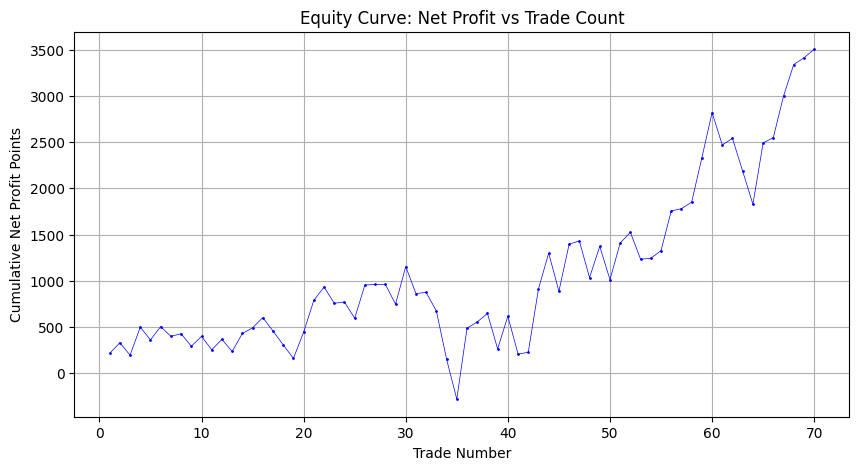

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from Google Drive
file_path = "/content/drive/My Drive/Nifty_50_OHLC.csv"

# Read the CSV file and ensure 'date' is parsed as an index
df = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Ensure the index is in datetime format
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)



# Fix: Reset index if code references df['date']
df = df.reset_index()  # 🔹 This will make 'date' a column again if needed

# Define the execution strategy
def execute_strategy(data, trade_log_file="/content/drive/My Drive/trade_execution_log.csv"):
    """
    Executes CE and PE trading strategies, logs trade details, and plots an Equity Curve.
    """
    # Initialize trade performance metrics
    total_trades = 0
    win_count = 0
    loss_count = 0
    net_profit = 0
    win_points = 0
    loss_points = 0
    ce_trade_count = 0
    pe_trade_count = 0

    # List to store trade details
    trade_log = []
    equity_curve = []  # Stores cumulative net profit after each trade

    # Iterate through the dataset to check trade conditions
    i = 1  # Start from row 1 to avoid index errors
    while i < len(data):
        # Check for PE trade setup
        if check_pe(data, i):
            pe_trade = execute_pe(data, i)

            # If no trade was executed, move to the next row
            if pe_trade['status'] == 'no_trade':
                i += 1
                continue

            # Update trade counters and profit calculations
            total_trades += 1
            net_profit += pe_trade['profit']
            pe_trade_count += 1
            equity_curve.append(net_profit)  # Update equity curve data

            # Determine if the trade was a win or loss
            if pe_trade['status'] == 'win':
                win_count += 1
                win_points += pe_trade['profit']
            else:
                loss_count += 1
                loss_points += pe_trade['profit']

            # Log trade details
            trade_log.append({
                "Trade Type": "PE",
                "Entry Datetime": pe_trade['entry_datetime'],
                "Exit Datetime": pe_trade['exit_datetime'],
                "Entry Price": pe_trade['entry_price'],
                "Exit Price": pe_trade['exit_price'],
                "Profit Points": pe_trade['profit'],
                "Status": pe_trade['status']
            })

            # Skip rows affected by this trade
            i += pe_trade['rows_used']
            continue

        # Check for CE trade setup
        if check_ce(data, i):
            ce_trade = execute_ce(data, i)

            # If no trade was executed, move to the next row
            if ce_trade['status'] == 'no_trade':
                i += 1
                continue

            # Update trade counters and profit calculations
            total_trades += 1
            net_profit += ce_trade['profit']
            ce_trade_count += 1
            equity_curve.append(net_profit)  # Update equity curve data

            # Determine if the trade was a win or loss
            if ce_trade['status'] == 'win':
                win_count += 1
                win_points += ce_trade['profit']
            else:
                loss_count += 1
                loss_points += ce_trade['profit']

            # Log trade details
            trade_log.append({
                "Trade Type": "CE",
                "Entry Datetime": ce_trade['entry_datetime'],
                "Exit Datetime": ce_trade['exit_datetime'],
                "Entry Price": ce_trade['entry_price'],
                "Exit Price": ce_trade['exit_price'],
                "Profit Points": ce_trade['profit'],
                "Status": ce_trade['status']
            })

            # Skip rows affected by this trade
            i += ce_trade['rows_used']
            continue

        # If no trade is triggered, move to the next row
        i += 1

    # Convert trade log to DataFrame and save to Google Drive
    trade_log_df = pd.DataFrame(trade_log)
    trade_log_df.to_csv(trade_log_file, index=False)

    print(f"Trade execution details saved to Google Drive: {trade_log_file}")

    # Prepare summary of strategy results
    strategy_summary = {
        'Total Trades': total_trades,
        'Winning Trades': win_count,
        'Losing Trades': loss_count,
        'Win Rate (%)': (win_count / total_trades * 100) if total_trades > 0 else 0,
        'Net Profit Points': net_profit,
        'Total Win Points': win_points,
        'Total Loss Points': loss_points,
        'Total CE Trades': ce_trade_count,
        'Total PE Trades': pe_trade_count
    }

    # Print summary of strategy performance
    print("\nStrategy Performance Summary:")
    for key, value in strategy_summary.items():
        print(f"{key}: {value}")

    # Plot the Equity Curve (Net Profit vs Trade Count)
    plt.figure(figsize=(10, 5))
    plt.plot(
        range(1, len(equity_curve) + 1),
        equity_curve,
        marker='o', linestyle='-', color='blue',
        markersize=1,
        linewidth=0.5
    )
    plt.xlabel("Trade Number")
    plt.ylabel("Cumulative Net Profit Points")
    plt.title("Equity Curve: Net Profit vs Trade Count")
    plt.grid(True)
    plt.show()

    return strategy_summary


# Run the execution strategy
strategy_results = execute_strategy(df)


Backtest and evaluate results on yearly basis

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from Google Drive
file_path = "/content/drive/My Drive/Nifty_50_OHLC.csv"  # ✅ Correct file name

# Read the CSV file and ensure 'date' is parsed as an index
df = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Ensure the index is in datetime format
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

# Fix: Reset index so 'date' is accessible as a column
df = df.reset_index()  # 🔹 This will make 'date' a column again if needed

# Define the execution strategy
def execute_strategy(data, trade_log_file="/content/drive/My Drive/trade_execution_log.csv"):
    """
    Executes CE and PE trading strategies, logs trade details, and provides yearly performance summaries.
    """
    # Initialize trade performance metrics
    yearly_stats = {}  # Dictionary to store yearly performance

    # List to store trade details
    trade_log = []

    # Iterate through the dataset to check trade conditions
    i = 1  # Start from row 1 to avoid index errors
    while i < len(data):
        trade_year = data.loc[i, 'date'].year  # Extract the year

        # Initialize yearly stats if not present
        if trade_year not in yearly_stats:
            yearly_stats[trade_year] = {
                'Total Trades': 0, 'Winning Trades': 0, 'Losing Trades': 0,
                'Win Rate (%)': 0, 'Net Profit Points': 0,
                'Total Win Points': 0, 'Total Loss Points': 0,
                'Total CE Trades': 0, 'Total PE Trades': 0
            }

        # Check for PE trade setup
        if check_pe(data, i):
            pe_trade = execute_pe(data, i)

            # If no trade was executed, move to the next row
            if pe_trade['status'] == 'no_trade':
                i += 1
                continue

            # Update trade counters and profit calculations
            yearly_stats[trade_year]['Total Trades'] += 1
            yearly_stats[trade_year]['Net Profit Points'] += pe_trade['profit']
            yearly_stats[trade_year]['Total PE Trades'] += 1

            # Determine if the trade was a win or loss
            if pe_trade['status'] == 'win':
                yearly_stats[trade_year]['Winning Trades'] += 1
                yearly_stats[trade_year]['Total Win Points'] += pe_trade['profit']
            else:
                yearly_stats[trade_year]['Losing Trades'] += 1
                yearly_stats[trade_year]['Total Loss Points'] += pe_trade['profit']

            # Log trade details
            trade_log.append({
                "Trade Type": "PE",
                "Entry Datetime": pe_trade['entry_datetime'],
                "Exit Datetime": pe_trade['exit_datetime'],
                "Entry Price": pe_trade['entry_price'],
                "Exit Price": pe_trade['exit_price'],
                "Profit Points": pe_trade['profit'],
                "Status": pe_trade['status'],
                "Year": trade_year
            })

            # Skip rows affected by this trade
            i += pe_trade['rows_used']
            continue

        # Check for CE trade setup
        if check_ce(data, i):
            ce_trade = execute_ce(data, i)

            # If no trade was executed, move to the next row
            if ce_trade['status'] == 'no_trade':
                i += 1
                continue

            # Update trade counters and profit calculations
            yearly_stats[trade_year]['Total Trades'] += 1
            yearly_stats[trade_year]['Net Profit Points'] += ce_trade['profit']
            yearly_stats[trade_year]['Total CE Trades'] += 1

            # Determine if the trade was a win or loss
            if ce_trade['status'] == 'win':
                yearly_stats[trade_year]['Winning Trades'] += 1
                yearly_stats[trade_year]['Total Win Points'] += ce_trade['profit']
            else:
                yearly_stats[trade_year]['Losing Trades'] += 1
                yearly_stats[trade_year]['Total Loss Points'] += ce_trade['profit']

            # Log trade details
            trade_log.append({
                "Trade Type": "CE",
                "Entry Datetime": ce_trade['entry_datetime'],
                "Exit Datetime": ce_trade['exit_datetime'],
                "Entry Price": ce_trade['entry_price'],
                "Exit Price": ce_trade['exit_price'],
                "Profit Points": ce_trade['profit'],
                "Status": ce_trade['status'],
                "Year": trade_year
            })

            # Skip rows affected by this trade
            i += ce_trade['rows_used']
            continue

        # If no trade is triggered, move to the next row
        i += 1

    # Convert trade log to DataFrame and save to Google Drive
    trade_log_df = pd.DataFrame(trade_log)
    trade_log_df.to_csv(trade_log_file, index=False)

    print(f"Trade execution details saved to Google Drive: {trade_log_file}")

    # Compute win rate for each year
    for year in yearly_stats.keys():
        total_trades = yearly_stats[year]['Total Trades']
        if total_trades > 0:
            yearly_stats[year]['Win Rate (%)'] = (yearly_stats[year]['Winning Trades'] / total_trades) * 100

    # Print yearly performance summary
    print("\nYearly Performance Summary:")
    for year, stats in sorted(yearly_stats.items()):
        print(f"\nYear: {year}")
        for key, value in stats.items():
            print(f"{key}: {value}")

    return yearly_stats


# Run the execution strategy
yearly_results = execute_strategy(df)


Trade execution details saved to Google Drive: /content/drive/My Drive/trade_execution_log.csv

Yearly Performance Summary:

Year: 2016
Total Trades: 5
Winning Trades: 3
Losing Trades: 2
Win Rate (%): 60.0
Net Profit Points: 360.2300760723765
Total Win Points: 633.3033024603392
Total Loss Points: -273.0732263879627
Total CE Trades: 2
Total PE Trades: 3

Year: 2017
Total Trades: 9
Winning Trades: 5
Losing Trades: 4
Win Rate (%): 55.55555555555556
Net Profit Points: 69.23271051693519
Total Win Points: 586.1894922530955
Total Loss Points: -516.9567817361603
Total CE Trades: 5
Total PE Trades: 4

Year: 2018
Total Trades: 8
Winning Trades: 5
Losing Trades: 3
Win Rate (%): 62.5
Net Profit Points: 502.23552959352673
Total Win Points: 943.4986901297889
Total Loss Points: -441.26316053626215
Total CE Trades: 4
Total PE Trades: 4

Year: 2019
Total Trades: 9
Winning Trades: 5
Losing Trades: 4
Win Rate (%): 55.55555555555556
Net Profit Points: -70.3487687893521
Total Win Points: 787.1776207962484
